In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
tf.__version__

'2.8.2'

In [20]:
keras.__version__

'2.8.0'

In [21]:
np.__version__

'1.21.6'

In [22]:
pd.__version__

'1.3.5'

In [23]:
from keras.datasets import mnist

In [24]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [25]:
X = np.concatenate([X_train,X_test])

In [26]:
y = np.concatenate([y_train,y_test])

In [27]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train, X_validation, y_train, y_validation = \
train_test_split(X_train_full,y_train_full,test_size=.2)

1


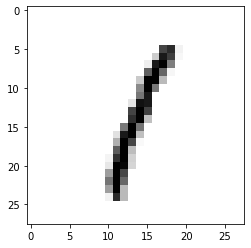

In [29]:
print(y_train[0])
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [30]:
X_train.shape

(44800, 28, 28)

In [31]:
X_train = X_train.reshape(-1,28*28)
X_validation = X_validation.reshape(-1,28*28) 
X_test = X_test.reshape(-1,28*28)

In [32]:
y_train =  to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [33]:
X_train.shape
y_train.shape

(44800, 784)

(44800, 10)

In [34]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

In [35]:
rf_model = RandomForestClassifier()

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
dt_model = DecisionTreeClassifier()

In [38]:
## fully_connected -- layer

In [39]:
X_train.shape

(44800, 784)

In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
y_train.shape[-1]

10

In [42]:
input_shape = X_train.shape[1:]
output_shape= y_train.shape[-1]
first_model = Sequential()
first_model.add(Dense(100,activation='relu',input_shape=input_shape))
first_model.add(Dense(50,activation='sigmoid'))
first_model.add(Dense(output_shape,activation='softmax'))

In [43]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
first_model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metrics
)

In [44]:
x = X_train
y = y_train
epochs = 20
batch_size = 200
validation_data = (X_validation, y_validation) 
first_model.fit(
    x = x,
    y = y,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = validation_data
)

Epoch 1/20
224/224 [==============================] - 4s 12ms/step - loss: 0.8598 - accuracy: 0.7909 - val_loss: 0.4562 - val_accuracy: 0.8852
Epoch 2/20
224/224 [==============================] - 2s 10ms/step - loss: 0.3542 - accuracy: 0.9049 - val_loss: 0.2815 - val_accuracy: 0.9205
Epoch 3/20
224/224 [==============================] - 2s 11ms/step - loss: 0.2728 - accuracy: 0.9210 - val_loss: 0.2546 - val_accuracy: 0.9255
Epoch 4/20
224/224 [==============================] - 2s 10ms/step - loss: 0.2389 - accuracy: 0.9296 - val_loss: 0.2301 - val_accuracy: 0.9333
Epoch 5/20
224/224 [==============================] - 2s 8ms/step - loss: 0.2182 - accuracy: 0.9351 - val_loss: 0.2114 - val_accuracy: 0.9355
Epoch 6/20
224/224 [==============================] - 2s 8ms/step - loss: 0.2083 - accuracy: 0.9378 - val_loss: 0.2075 - val_accuracy: 0.9379
Epoch 7/20
224/224 [==============================] - 2s 7ms/step - loss: 0.1893 - accuracy: 0.9430 - val_loss: 0.1929 - val_accuracy: 0.9423
Ep

In [45]:
first_model.evaluate(X_test,y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.1566 - accuracy: 0.9539


[0.15664131939411163, 0.9539285898208618]

In [46]:
from keras.datasets import fashion_mnist

In [47]:
(X_train_full, y_train_full), (X_test, y_test)  = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [48]:
X = np.concatenate([X_train_full, X_test])
y = np.concatenate([y_train_full,y_test])

In [49]:
X_train_full ,X_test, y_train_full, y_test = train_test_split(X,y,test_size=.2)

In [50]:
X_train, X_validation, y_train, y_validation =\
train_test_split(X_train_full,y_train_full,test_size=.2)

In [51]:
X_train.shape

(44800, 28, 28)

In [52]:
X_train = X_train.reshape(-1,28*28)
X_validation = X_validation.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

In [53]:
input_shape = X_train.shape[1:]
output_shape = y_test.shape[-1]
second_model = Sequential()
second_model.add(Dense(512,activation='sigmoid',input_shape=input_shape))
second_model.add(Dense(256,activation='relu'))
second_model.add(Dense(output_shape,activation='softmax'))

In [54]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [55]:

second_model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
second_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_validation,y_validation)
)

Epoch 1/10
700/700 [==============================] - 8s 11ms/step - loss: 0.8041 - accuracy: 0.6941 - val_loss: 0.7409 - val_accuracy: 0.7179
Epoch 2/10
700/700 [==============================] - 7s 10ms/step - loss: 0.7604 - accuracy: 0.7057 - val_loss: 0.7794 - val_accuracy: 0.7082
Epoch 3/10
700/700 [==============================] - 11s 16ms/step - loss: 0.7396 - accuracy: 0.7089 - val_loss: 0.7323 - val_accuracy: 0.7262
Epoch 4/10
700/700 [==============================] - 12s 17ms/step - loss: 0.7190 - accuracy: 0.7152 - val_loss: 0.7422 - val_accuracy: 0.7103
Epoch 5/10
700/700 [==============================] - 11s 15ms/step - loss: 0.7023 - accuracy: 0.7212 - val_loss: 0.7178 - val_accuracy: 0.7330
Epoch 6/10
700/700 [==============================] - 10s 15ms/step - loss: 0.6858 - accuracy: 0.7329 - val_loss: 0.6622 - val_accuracy: 0.7488
Epoch 7/10
700/700 [==============================] - 8s 11ms/step - loss: 0.6994 - accuracy: 0.7201 - val_loss: 0.7198 - val_accuracy: 0.

In [57]:
second_model.evaluate(X_test,y_test)

438/438 [==============================] - 2s 4ms/step - loss: 0.6535 - accuracy: 0.7356


[0.6535375118255615, 0.7355714440345764]

4

2

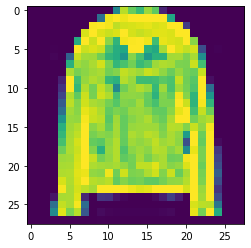

In [58]:
np.argmax(y_test[0])
plt.imshow(X_test[0].reshape(28,28))
np.argmax(second_model.predict(X_test[[0]]))

2장

In [59]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import imdb
import numpy as np
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [60]:
(X_train_full, y_train_full), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [61]:
X_train_full.shape

(25000,)

In [62]:
X = np.concatenate([X_train_full, X_test])
y = np.concatenate([y_train_full, y_test])

In [63]:
x_len = []
for i in X[0:10]:
  x_len.append(len(i))

In [64]:
max(x_len)

562

In [65]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [66]:
index_word = {}
for k,v in word_index.items():
  index_word[v] = k

In [67]:
index_word = {v:k for k,v in word_index.items()}

In [68]:
dt = []
for i in X_train_full[0]:
  dt.append(index_word[i])

In [69]:
import numpy as np
np.random.seed(10)
data = np.random.randint(1,100,(100,7))

In [70]:
data

array([[10, 16, 65, 29, 90, 94, 30],
       [ 9, 74,  1, 41, 37, 17, 12],
       [55, 89, 63, 34, 73, 79, 50],
       [52, 55, 78, 70, 14, 26, 14],
       [93, 87, 31, 31, 90, 13, 66],
       [32, 58, 37, 28, 19, 94, 78],
       [23, 24, 95, 12, 29, 75, 89],
       [10, 16, 19, 81, 72, 89, 12],
       [18, 47,  8, 76, 29, 34, 85],
       [97, 89, 45,  6,  5, 72, 89],
       [89, 51, 55, 35, 16, 78, 89],
       [16,  7, 86, 23, 12, 13, 93],
       [97, 63, 58, 80, 43, 58, 98],
       [51, 46, 41, 90, 74, 38,  1],
       [19, 24,  4, 30, 17, 85, 83],
       [15, 52, 80, 18, 51, 54, 26],
       [49, 18, 33, 82, 81, 42, 91],
       [13, 31, 82, 18, 17,  1, 32],
       [74, 65, 39, 23, 97, 67, 68],
       [63, 96, 28, 83, 63, 78, 49],
       [94, 76, 87, 38, 12, 22, 34],
       [96, 44, 89, 97, 74, 41, 44],
       [91, 72,  9, 86, 73, 29, 31],
       [90, 26, 79, 82, 86, 63, 14],
       [42, 34,  5, 88, 95, 29, 40],
       [92, 10,  8, 23, 33,  4, 10],
       [53, 77, 69, 31, 71, 75, 31],
 

In [71]:
data_set = []
for i in data:
  result = np.sort(data[0])[-1] - np.sort(data[0])[-2]
  data_set.append(result)

In [72]:
data_set

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [73]:
data[np.array(data_set) == 0]

array([], shape=(0, 7), dtype=int64)

In [74]:
np.apply_along_axis(xxx,1,data)

array([ 4, 33, 10,  8,  3, 16,  6,  8,  9,  8,  0,  7,  1, 16,  2, 26,  9,
       50, 23, 13,  7,  1,  5,  4,  7, 59,  2, 10,  9,  8, 14,  5, 18, 17,
       35, 16, 10, 11,  9, 11, 28, 19,  4, 17,  7, 16,  1,  7, 12,  8,  8,
        0, 21,  9, 10,  1,  1, 10, 10, 25,  6,  5,  2, 21,  4,  3,  8,  3,
        1,  4,  2,  8,  6,  3, 11, 20,  1, 19,  3, 15, 11,  7,  7, 15,  1,
       31,  0, 26,  7,  0,  2,  3,  2,  1, 10, 27,  4,  1,  4, 59])

In [75]:
def xxx(x):
  return np.sort(x)[-1] - np.sort(x)[-2]

In [77]:
import pandas as pd
pd.Series(x).apply(len).max()

ValueError: ignored

In [78]:
def make_sentence(x):
  sentence = []
  for i in x:
    word = index_word.get[i]
    if word is not None:
      word = ' '
    sentence.append(word)
  return ' '.join(sentence)

In [85]:
X = pd.Series(X).apply(make_sentence)

TypeError: ignored

In [ ]:
unique_word = []
for i in X:
  unique_word.extend(i.split())
unique_word = list(set(unique_word))

In [87]:
word_index = {v: i+1 for i, v in enumerate(unique_word)}

In [88]:
index_word=  {v: k for k, v in word_index.items()}

In [90]:
def sentence_int(x):
  result = []
  for i in x.split():
    word_index[i]
  return result

In [92]:
import numpy as np

In [93]:
a = np.arange(15)

In [94]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [96]:
a.reshape(5,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [97]:
a.shape

(15,)

In [98]:
a.ndim

1

In [99]:
a.itemsize

8

In [100]:
a = np.array([1,2,3])

In [101]:
a

array([1, 2, 3])

In [105]:
np.arange(1,10,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [112]:
np.linspace(1,50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [115]:
rg = np.random.default_rng(1)
a = np.ones((2,3))
b = rg.random((2,3))

In [116]:
b

array([[0.51182162, 0.9504637 , 0.14415961],
       [0.94864945, 0.31183145, 0.42332645]])

In [117]:
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [118]:
a = a*3

In [119]:
a

array([[3., 3., 3.],
       [3., 3., 3.]])

In [120]:
b = a+b

In [121]:
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])